<a href="https://colab.research.google.com/github/Kggzzz/Multivaririate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#นำข้อมูล Pizza มาทำตามที่เรียน 



In [1]:
#เรียกใช้ pandas
import pandas as pd

การดึงข้อมูลมาใช้ เลือกใช้การดึงข้อมูลแบบ โหลดไฟล์ลง colab แล้วดึงออกมา 

In [3]:
data = pd.read_csv('Pizza.csv')
data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [4]:
data.shape

(300, 9)

ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b554aec10>,
      dtype=object)

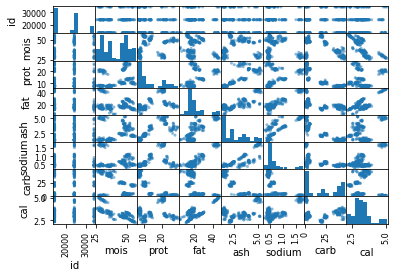

In [5]:
pd.plotting.scatter_matrix(data)

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก 

โดยตัดให้เหือเพียงคอลั่มที่เป้นตัวเลขเพื่อใช้ในการคำนวณหาค่าที่ correlation 

In [6]:
newdata = data.iloc[:,1:]
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [7]:
#เรียกใช้ numpy เนื่องจากใช้ข้อมูลที่เป็นตัวเลข 
import numpy as np

In [8]:
corr = np.corrcoef(newdata.to_numpy().T)

In [9]:
#เช็คจำนวนแถวและหลัก ของ corr
corr.shape

(8, 8)

In [10]:
#เรียก corr ที่ทำมาดู
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

วนลูปหาค่า correlation ที่ซ้ำกัน 


In [11]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
          print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

#พบว่า correlation ไม่มีตัวซ้ำกัน จึงไม่จำเป็นตั้งตัดข้อมูลใดออก

plot กราฟ

In [12]:
data_test = data.drop(['id'],axis=1) 
data_test
#นำชื่อ column ที่เป็น 'id' ออก 
#เหลือชื่อ 'brand' ในการจัดกลุ่มข้อมูล

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [13]:
data_test2 = data.drop(['id','brand'],axis=1) 
data_test2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [14]:
#เรียกใช้ pyplot จาก matplotlib
from matplotlib import pyplot as plt

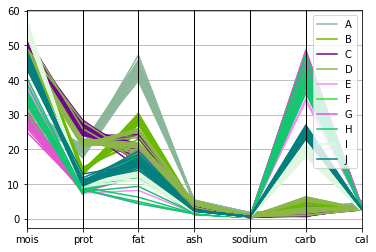

In [15]:
pd.plotting.parallel_coordinates(data_test, 'brand')
#จากการลอง plotting ทำให้รู้ว่าข้อมูล brandที่ต้องการพอตจะดูข้อมูลยากเราจึงต้องแก้ไข 

ปัญหาที่เกิดขึ้นคือ Dimention ของเราเยอะไป เราจึงต้องทำ PCA ในการจัดการข้อมูล

โดยทำ PCA เพื่อลดจำนวน dimention ของข้อมูล ที่มีมากเกินไป

In [16]:
#import
from sklearn.decomposition import PCA

In [17]:
#defind
pca = PCA(n_components=2)

In [18]:
new_pca = pca.fit_transform(data_test2.to_numpy()) 

In [19]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [20]:
new_pca.shape

(300, 2)

In [21]:
#สร้างตัวแปร brand ให้เป็นเซ็ตของข้อมูลที่มีชื่อ brand มาเป็นข้อมูล
Brand = set(data['brand'])
Brand 

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

เราจะทำการแทนค่า text  คือชื่อ brand ที่เป็น {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'} ให้เป็นตัวเลขก็จะสามารถ plot สีของกราฟได้

In [22]:
Brand_l = list(Brand)
Brand_l.sort() #เป็นการเรียงค่า ตัวเลขจากน้อยไปมาก ตัวหนังสือจาก a-z
color_list = {}
num = 0
for each_b in Brand:
   if each_b not in color_list:
#สร้าง dictionaly เพื่อสร้างเก็บข้อมูล โดยการวนลูป
       color_list[each_b] = num
       num += 1

In [23]:
color_list #จากผล ตอนแรก brand มีชื่อตัวหนังสือที่เรียงกันอยู่แล้ว ดังนั้นพอใส่ .sort() ผลจึงเหมือนเดิม
#จะเห็นว่าชื่อ brand จะถูกเปลี่ยนให้เป็นเลขต่างๆ ตามผล out put นี้

{'A': 2,
 'B': 6,
 'C': 7,
 'D': 1,
 'E': 9,
 'F': 8,
 'G': 3,
 'H': 0,
 'I': 5,
 'J': 4}

จากนั้นแทนค่า text ที่เราได้ใน Dictionary ด้วยตัวเลขที่เรากำหนดมา

In [24]:
data2 = data_test.replace(color_list) #replacee คือการ

In [25]:
data2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,2,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,2,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,2,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,2,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,4,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,4,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,4,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,4,47.60,10.43,15.18,2.32,0.56,24.47,2.76


ลอง plot scatter จากข้อมูลโดยแบ่งตาม brand

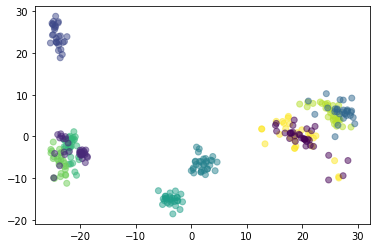

In [26]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data2['brand'],alpha=0.5)
#ดูการกระจายของข้อมูล

ทดลอง เปรียบเทียบ brand  A และ B

In [27]:
test1 = data2[(data2['brand']==5) | (data2['brand']==9)]  #ดูค่าจาก colorlist
test1

,brand,mois,prot,fat,ash,sodium,carb,cal
119,9,34.58,7.44,16.24,1.31,0.39,40.43,3.38
120,9,36.84,7.77,17.07,1.37,0.40,36.95,3.33
121,9,35.14,8.05,15.77,1.38,0.41,39.66,3.33
122,9,39.25,8.67,4.44,1.54,0.51,46.10,2.59
123,9,34.51,7.75,14.87,1.42,0.42,41.45,3.31
124,9,39.59,8.36,4.39,1.52,0.48,46.14,2.58
125,9,34.94,7.81,13.67,1.36,0.40,42.22,3.23
126,9,39.36,8.10,16.44,1.45,0.44,34.65,3.19
127,9,36.04,7.74,15.49,1.45,0.45,39.28,3.27
128,9,36.54,7.75,15.67,1.43,0.44,38.61,3.26


จากนั้นนำตารางข้อมุลที่เปรียบเทียบแบร์น A และ B มาลอง plot โดยในการพอตต้องการเปรียบเทียบเพีงแค่ 2 dimention 

In [28]:
pca2 = PCA(n_components=2) #ต้องการแค่ 2 dimention
new_pca2 = pca2.fit_transform(test1.iloc[:,1:].to_numpy())

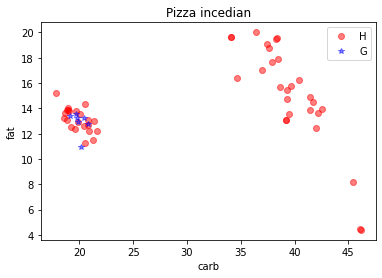

In [29]:
plt.plot(test1['carb'][:50],test1['fat'][:50],'or',alpha=0.5,label = 'H')
plt.plot(test1['carb'][50:100],test1['fat'][50:100],'*b',alpha=0.5,label = 'G')
plt.legend()
plt.title('Pizza incedian'); #ตั้งชื่อกราฟโดยใช้ .title
plt.xlabel('carb'); ##ชื่อแกน x (ใส่ ; เพื่อไม่ให้ตัวหนังสือทับกับกราฟ ต้องใส่ลงไปหลังคำสั่งต่างๆ)
plt.ylabel('fat'); ##ชื่อแกน y

Principle components เป็นตัวแทนของข้อมูลได้ว่าดีแค่ไหน

In [30]:
pca2.explained_variance_ratio_

array([0.93671711, 0.06174895])

#ดึงข้อมูล nnbd มาเปรียบเทียบสินค้าใหม่ให้ไม่ซื้อเดิม

In [31]:
nn_data = pd.read_csv('nndb_flat.csv')
nn_data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [ ]:
nn_data.shape

ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

In [ ]:
pd.plotting.scatter_matrix(nn_data)

จากภาพจะเห็นได้ว่าข้อมูลมีการทับซื้อนกันเยอะมาก ทำให้สามารถอ่านค่าในกราฟ กราฟนี้ไดั

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [ ]:
#เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข
new_nndata = data.iloc[:,7:]
new_nndata.head()

```import numpy as np```

ดึงฟังก์ชั่น numpy ที่ทำงานเกี่ยวกับตัวเลขมา  

In [ ]:
corr2 = np.corrcoef(newdata.to_numpy().T)

In [ ]:
corr2.shape

In [ ]:
corr2

In [ ]:
for i in range(corr2.shape[0]):
    for j in range(corr2.shape[1]):
        if (i !=j) and (corr2[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr2[i,j]}')

```from matplotlib import pyplot as plt```

ดึงฟังก์ชั่น matplotlib จาก pyplot